In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

In [2]:
# CAMERA CALIBRATION

# find corners
def find_corners(img_list):
    objpoints = []  # 3D
    imgpoints = []  # 2D
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)  # create blank grid
    
    for image in img_list:   # for all images, create large array of 3D and 2D points
        img = cv2.imread(image)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
    return imgpoints, objpoints


# calibrate camera
def calibrate_cam(img, imgpoints, objpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [3]:
# TESTING CAMERA CALIBRATION

image_folder = glob.glob("camera_cal/*")

test_img = mpimg.imread(image_folder[4])

imgpoints, objpoints = find_corners(image_folder)

dst = calibrate_cam(test_img, imgpoints, objpoints)

# display

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()

# ax1.imshow(test_img)
# ax1.set_title('original image', fontsize=40)

# ax2.imshow(dst)
# ax2.set_title('calibrated image', fontsize=40)
# plt.show()

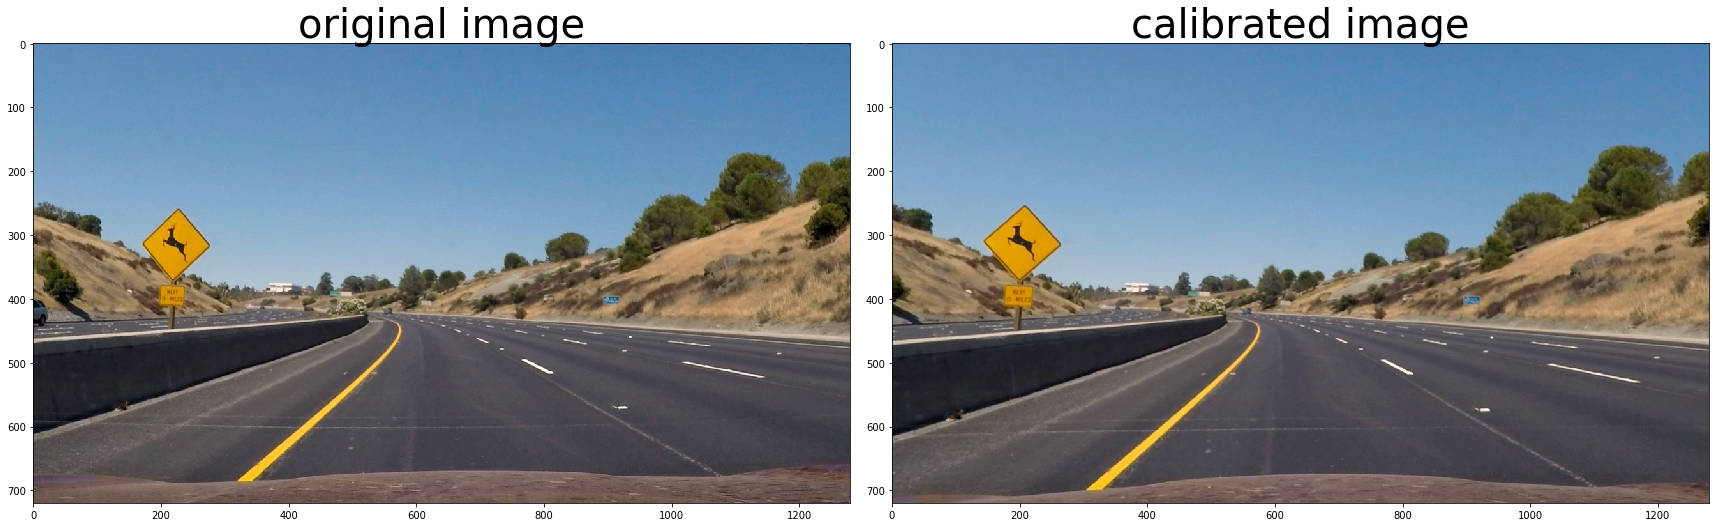

In [4]:
# CALIBRATOIN APPLIED TO ROAD IMAGE

road_image_folder = glob.glob("test_images/*")

test_img = mpimg.imread(road_image_folder[7])

dst = calibrate_cam(test_img, imgpoints, objpoints)

# display
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(test_img)
ax1.set_title('original image', fontsize=40)

ax2.imshow(dst)
ax2.set_title('calibrated image', fontsize=40)
plt.show()

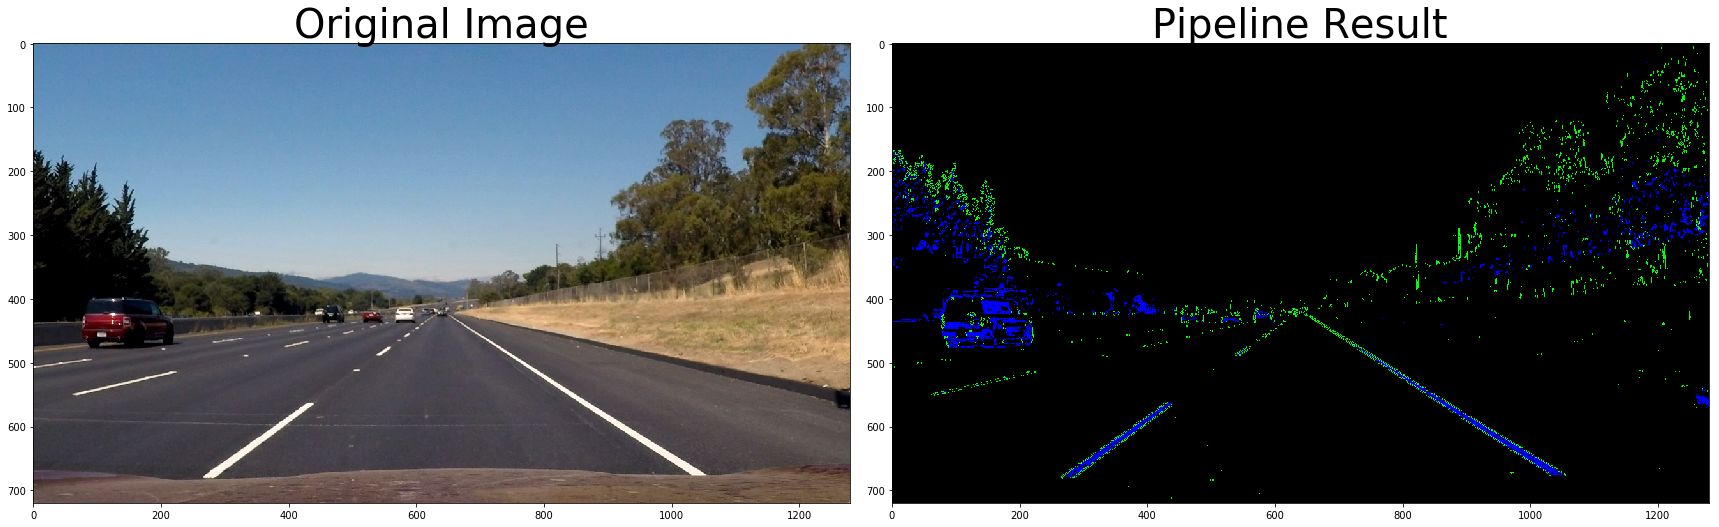

In [19]:
# THRESHOLDED BINARY IMAGE (color transforms, gradients, etc.)
image = mpimg.imread(road_image_folder[2])

# Edit this function to create your own pipeline.
def thresh_binary(img, s_thresh=(200, 255), sx_thresh=(40, 90)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
threshed_image = thresh_binary(image)

# display
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(threshed_image)
ax2.set_title('Pipeline Result', fontsize=40)
plt.show()

In [ ]:
# PERSPECTIVE TRANSFORM

In [ ]:
# FIND LANE BOUNDARY

In [ ]:
# DETERMINE CURVATURE OF LANE AND VEHICLE POSITION

In [ ]:
# WARP DETECTED LANE BOUNDARIES BACK ONTO ORIGINAL IMAGE

In [ ]:
# DISPLAY LANE BOUNDARIES, LANE CURVATURE, AND VEHICLE POSITION